In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
cwd = '/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data'
for dirname, _, filenames in os.walk(cwd):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/test.csv
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/train.csv
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/sample_submission.csv
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/ohe_city_tier.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_ADDRESS_classes.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_city_tier.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_ADDRESS.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/ohe_POSTED_BY.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_city_tier_classes.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_POSTED_BY.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_BHK_OR_RK_classes.sav
/Users/lukemcevoy/Develop/stevens/f21

In [3]:
data = pd.read_csv('/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/train.csv')
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
data['ADDRESS'] = data['ADDRESS'].str.split(',').apply(lambda x: x[-1])

In [6]:
data['ADDRESS'].value_counts(ascending=False).head(25)

Bangalore        4340
Lalitpur         2993
Mumbai           2023
Pune             1991
Noida            1767
Kolkata          1709
Maharashtra      1579
Chennai          1255
Ghaziabad        1087
Jaipur            962
Chandigarh        696
Faridabad         649
Mohali            556
Vadodara          510
Gurgaon           430
Surat             423
Nagpur            336
Lucknow           327
Indore            306
Bhubaneswar       235
Bhopal            218
Kochi             205
Visakhapatnam     179
Bhiwadi           161
Goa               149
Name: ADDRESS, dtype: int64

In [7]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Maharashtra']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'
    
data['city_tier'] = data['ADDRESS'].apply(map_city)

<AxesSubplot:xlabel='PRICE_IN_LACS', ylabel='Count'>

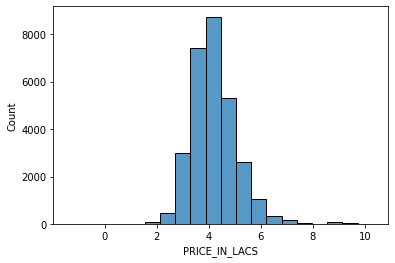

In [8]:
data['PRICE_IN_LACS'] = np.log(data['TARGET(PRICE_IN_LACS)'])
sns.histplot(data['PRICE_IN_LACS'], bins=20)

In [9]:
print(data['PRICE_IN_LACS'])

0        4.007333
1        3.931826
2        3.761200
3        4.135167
4        4.102643
           ...   
29446    3.806662
29447    2.772589
29448    3.299534
29449    4.204693
29450    3.325036
Name: PRICE_IN_LACS, Length: 29451, dtype: float64


<AxesSubplot:xlabel='area', ylabel='Count'>

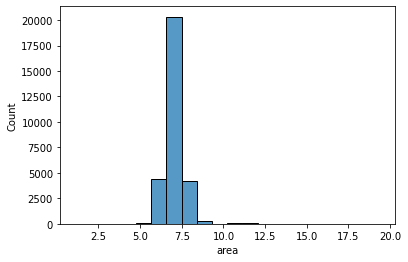

In [10]:
# taking log of square_ft as well
data['area'] = np.log(data['SQUARE_FT'])
sns.histplot(data['area'], bins=20)

In [13]:
def plot_numerical(feature):
    sns.lmplot(x=feature, y='TARGET(PRICE_IN_LACS)', data=data)
    plt.show()
    
def plot_categorical(feature, figsize=None):
    df = data.groupby([feature])['TARGET(PRICE_IN_LACS)'].describe()[['mean', '50%', 'min', 'count']]

    labels = df.index.values
    x = np.arange(len(labels))
    width = 0.9
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # plot bars for min, median and mean house price
    rects1 = ax1.bar(x-width/2, df['50%'], width/3, label='median')
    rects2 = ax1.bar(x-width/6, df['mean'], width/3, label='mean')
    rects3 = ax1.bar(x+width/6, df['min'], width/3, label='min')

    ax1.set_ylabel('PRICE_IN_LACS', fontsize=12)
    ax1.set_title(feature, fontsize=15)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, rotation=0)
    ax1.legend()

    # plot counts of data points
    ax2 = ax1.twinx()
    ax2.set_ylabel('Counts', fontsize=12)
    ax2.plot(x-width/2, df['count'], color='red', linestyle='dashed')

    # annotate counts of data points
    for i, rect in enumerate(rects2):
        height = int(round(rect.get_height()))
        ax1.annotate('{}'.format(int(df['count'].iloc[i])),
                     xy=(rect.get_x() + rect.get_width()/2, height),
                     xytext=(0, 3), textcoords="offset points",
                     ha='center', va='bottom', color='red')
    plt.show()

In [14]:
categorical_features = ['POSTED_BY', 'BHK_OR_RK', 'city_tier', 'ADDRESS']
numerical_features = ['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE', 'area']

In [15]:
import matplotlib.pyplot as plt
def plot_numerical(feature):
    y='TARGET(PRICE_IN_LACS)'
    plt.scatter(feature, y, data=data)
    plt.xlabel(feature) 
    plt.ylabel(y)
    plt.show()

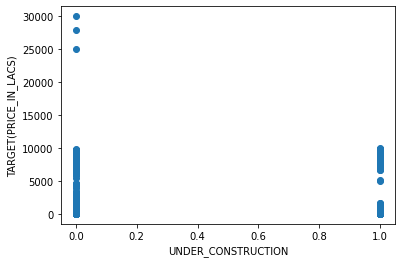

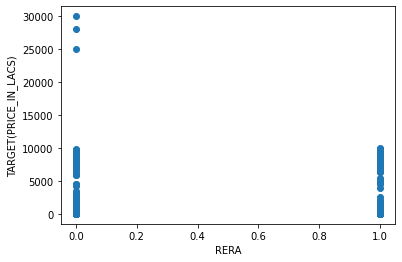

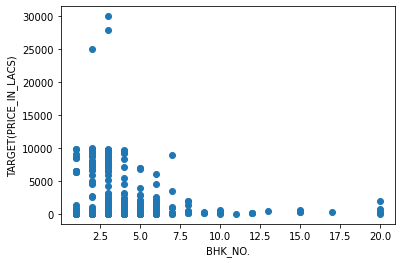

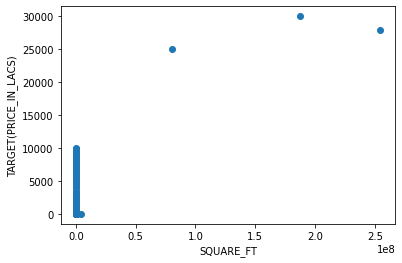

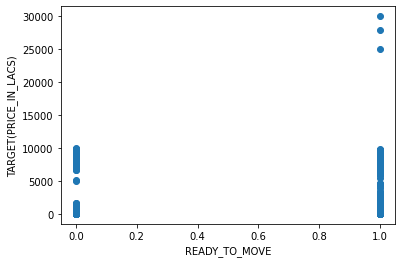

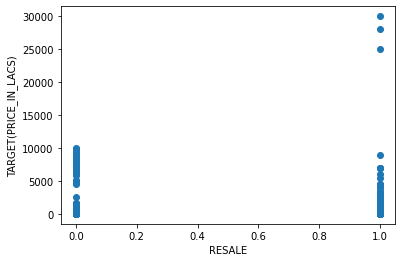

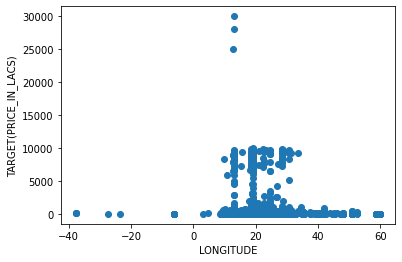

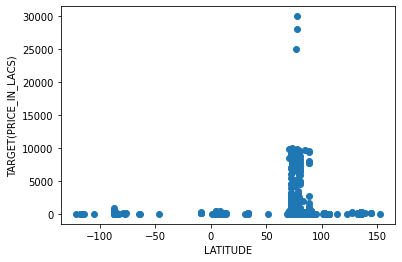

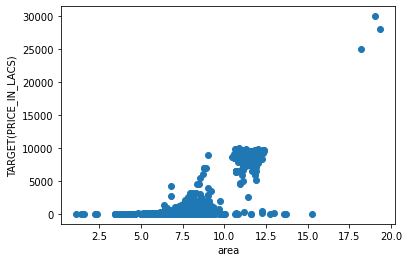

In [16]:
for num_feature in numerical_features:
    plot_numerical(num_feature)

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [18]:
def plot_linearReg(feature):
    sns.regplot(x=feature, y=y, data=data);
    plt.imshow(feature, cmap='hot', interpolation='nearest')
    plt.show()

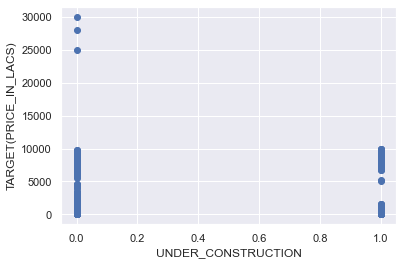

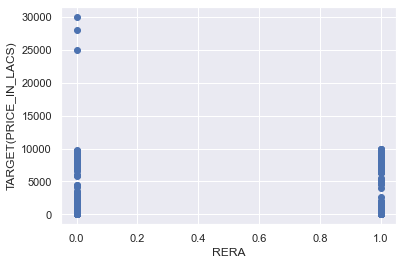

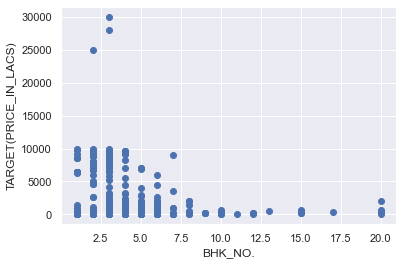

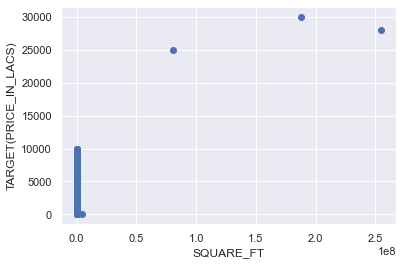

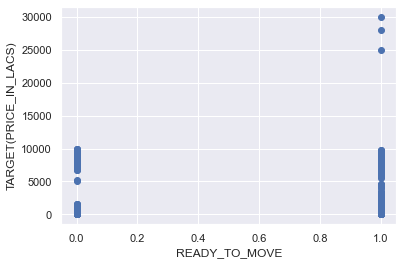

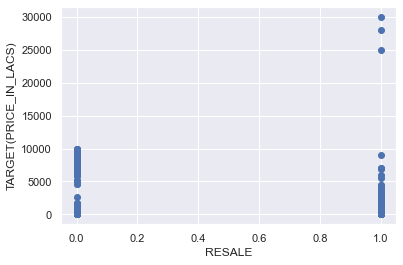

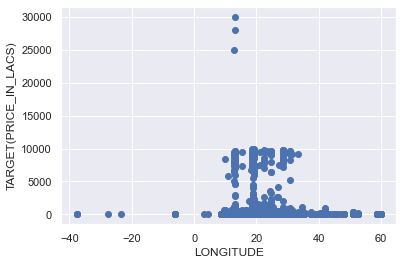

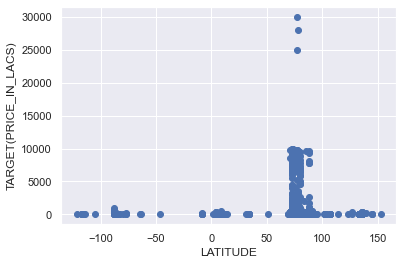

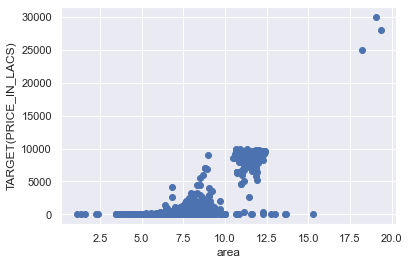

In [19]:
for num_feature in numerical_features:
    plot_numerical(num_feature)

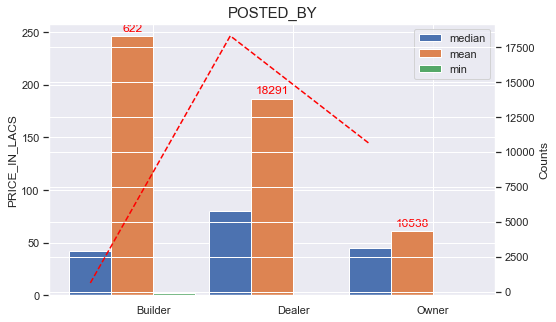

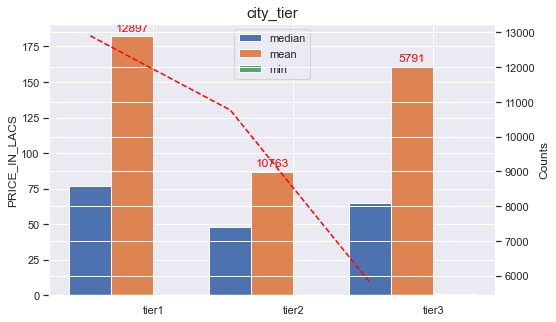

In [20]:
for feature in ['POSTED_BY', 'city_tier']:
    plot_categorical(feature)

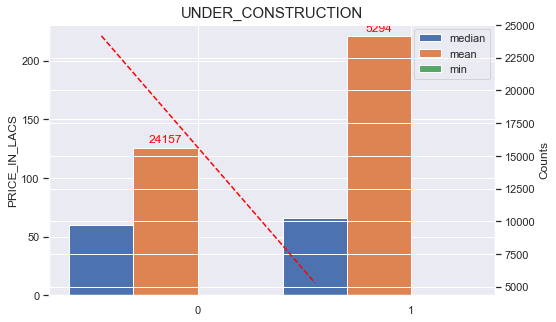

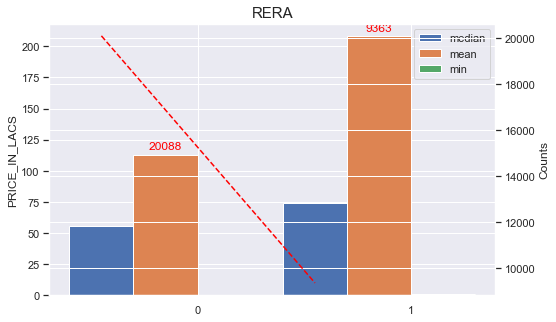

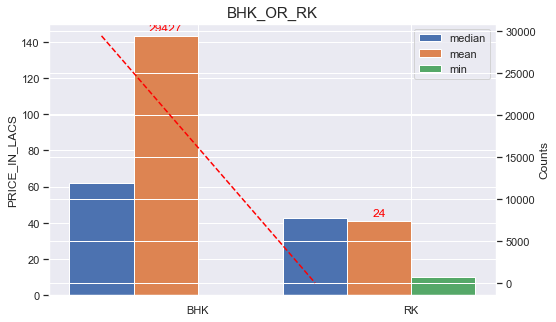

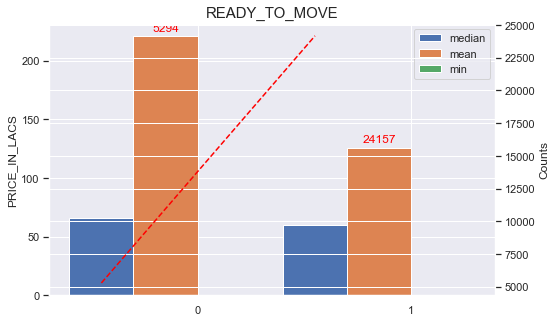

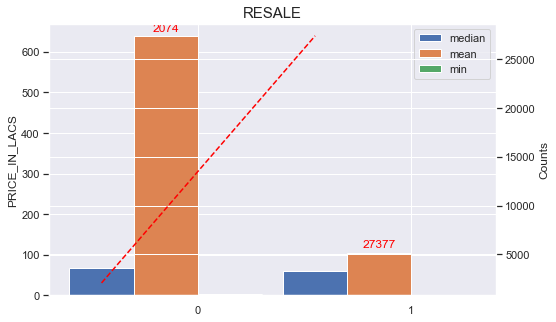

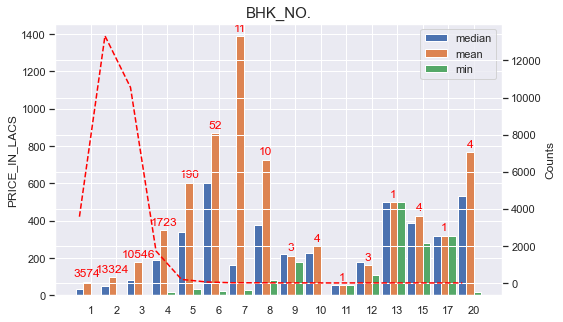

In [61]:
for feature in ['UNDER_CONSTRUCTION', 'RERA', 'BHK_OR_RK', 'READY_TO_MOVE', 'RESALE', 'BHK_NO.']:
    plot_categorical(feature)

In [21]:
df = data.groupby(['ADDRESS'])['TARGET(PRICE_IN_LACS)'].describe()[['mean', 'count']]
df = df[df['count']>20]

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib

In [23]:
df = data.copy()
path = cwd
for i, feature in enumerate(categorical_features):
    
    le = LabelEncoder()
    ohe = OneHotEncoder(sparse=False)

    # create directory to save label encoding models
    if not os.path.exists(os.path.join(path, "TextEncoding")):
        os.makedirs(os.path.join(path, "TextEncoding"))

    # perform label encoding
    le.fit(df[feature])
    # save the encoder
    joblib.dump(le, open(os.path.join(path, "TextEncoding/le_{}.sav".format(feature)), 'wb'))
    
    # transfrom training data
    df[feature] = le.transform(df[feature])

    # get classes & remove first column to elude from dummy variable trap
    columns = list(map(lambda x: feature+' '+str(x), list(le.classes_)))[1:]
    
    # save classes
    joblib.dump(columns, 
                open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'wb'))
    # load classes
    columns = joblib.load(
        open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'rb'))

    if len(le.classes_)>2 and feature!='ADDRESS':
        # perform one hot encoding
        ohe.fit(df[[feature]])
        # save the encoder
        joblib.dump(ohe, 
                    open(os.path.join(path, "TextEncoding/ohe_{}.sav".format(feature)), 'wb'))

        # transfrom training data
        # removing first column of encoded data to elude from dummy variable trap
        tempData = ohe.transform(df[[feature]])[:, 1:]

        # create Dataframe with columns as classes
        tempData = pd.DataFrame(tempData, columns=columns)
    else:
        tempData = df[[feature]]
    
    # create dataframe with all the label encoded categorical features along with hot encoding
    if i==0:
        encodedData = pd.DataFrame(data=tempData, columns=tempData.columns.values.tolist())
    else:
        encodedData = pd.concat([encodedData, tempData], axis=1)

In [24]:
df = df[numerical_features+['TARGET(PRICE_IN_LACS)', 'PRICE_IN_LACS']]
df = pd.concat([df, encodedData], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     29451 non-null  int64  
 1   RERA                   29451 non-null  int64  
 2   BHK_NO.                29451 non-null  int64  
 3   SQUARE_FT              29451 non-null  float64
 4   READY_TO_MOVE          29451 non-null  int64  
 5   RESALE                 29451 non-null  int64  
 6   LONGITUDE              29451 non-null  float64
 7   LATITUDE               29451 non-null  float64
 8   area                   29451 non-null  float64
 9   TARGET(PRICE_IN_LACS)  29451 non-null  float64
 10  PRICE_IN_LACS          29451 non-null  float64
 11  POSTED_BY Dealer       29451 non-null  float64
 12  POSTED_BY Owner        29451 non-null  float64
 13  BHK_OR_RK              29451 non-null  int64  
 14  city_tier tier2        29451 non-null  float64
 15  ci

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics, preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBRegressor

In [27]:
train_data = df.copy()
feature_cols = [feature for feature in train_data.columns if feature not in(['READY_TO_MOVE', 'ADDRESS', 'TARGET(PRICE_IN_LACS)', 
                                                                             'SQUARE_FT', 'PRICE_IN_LACS'])]
print('features used: ', feature_cols)


features used:  ['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'RESALE', 'LONGITUDE', 'LATITUDE', 'area', 'POSTED_BY Dealer', 'POSTED_BY Owner', 'BHK_OR_RK', 'city_tier tier2', 'city_tier tier3']


In [28]:
X = train_data[feature_cols]
y = train_data['PRICE_IN_LACS']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

y1 = train_data['TARGET(PRICE_IN_LACS)']
validation_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

In [27]:
y_test

22796    3.871201
20812    2.197225
10106    4.012773
28692    4.787492
2717     3.332205
           ...   
21056    4.317488
29086    4.605170
15831    2.995732
27676    4.418841
28788    5.010635
Name: PRICE_IN_LACS, Length: 5891, dtype: float64

In [28]:
model = XGBRegressor( 
    n_estimators = 500,
    learning_rate=0.02, 
    seed=7)

In [29]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, X_test, y_test, cv=30, return_times=True)

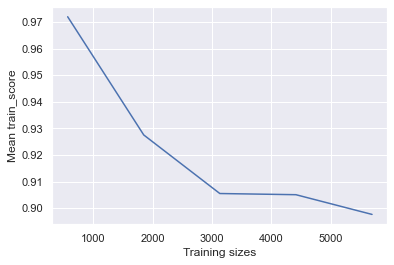

In [30]:
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

In [31]:
model = model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    verbose=False)

In [32]:
model.score(X_test, y_test)

0.8425897270434302

In [29]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.575084467803466

In [70]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(regr, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

KeyboardInterrupt: 

In [35]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7369689690648082

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_cols,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

In [ ]:
dot_data

In [36]:
tree.plot_tree(clf)

[Text(219.93878896236598, 214.6523076923077, 'X[6] <= 7.565\nsquared_error = 0.815\nsamples = 23560\nvalue = 4.208'),
 Text(118.25892327630095, 209.07692307692307, 'X[6] <= 6.908\nsquared_error = 0.534\nsamples = 20781\nvalue = 4.048'),
 Text(53.99829227433697, 203.50153846153847, 'X[7] <= 0.5\nsquared_error = 0.536\nsamples = 8138\nvalue = 3.702'),
 Text(23.27312115039439, 197.92615384615385, 'X[6] <= 6.564\nsquared_error = 0.282\nsamples = 3583\nvalue = 3.334'),
 Text(10.211616563586446, 192.35076923076923, 'X[4] <= 19.581\nsquared_error = 0.301\nsamples = 1404\nvalue = 3.07'),
 Text(4.24739463171377, 186.7753846153846, 'X[6] <= 6.324\nsquared_error = 0.233\nsamples = 601\nvalue = 3.275'),
 Text(0.9114147265907491, 181.2, 'X[5] <= 73.051\nsquared_error = 0.289\nsamples = 224\nvalue = 3.101'),
 Text(0.3050399552164495, 175.6246153846154, 'X[0] <= 0.5\nsquared_error = 0.466\nsamples = 26\nvalue = 3.541'),
 Text(0.16787433777012659, 170.04923076923077, 'X[6] <= 6.195\nsquared_error = 0.

Error in callback <function flush_figures at 0x7f80ae6ce4c0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

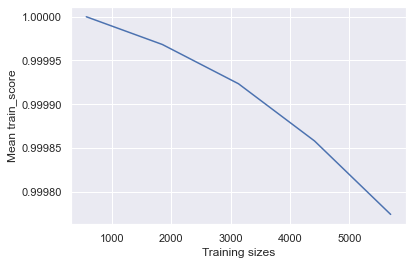

In [37]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(clf, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

In [38]:
from sklearn.neural_network import MLPRegressor
nnregr = MLPRegressor(random_state=1, max_iter=100000)
nnregr.fit(X_train, y_train)
nnregr.score(X_test, y_test)

0.6930506508632484

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(nnregr, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
from sklearn import linear_model
reg = linear_model.Lars(n_nonzero_coefs=12, normalize=False)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(reg, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10000, random_state=0)
regr.fit(X_train, y_train)
# tree.plot_tree(regr)
regr.score(X_test, y_test)

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(regr, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

In [ ]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(reg, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(neigh, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(reg, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()